# Human Resorce Data to Predict Employee Attrition

Developed a model that could predict which employees are more likely to quit their job. This fictional data created by an IBM data scientist.

___

### Load the libraries and the data

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
DataFrame=pd.read_csv("IBM Attrition Data.csv")

In [3]:
DataFrame.head()

Age Attrition              Department  DistanceFromHome  Education  \
0   41       Yes                   Sales                 1          2   
1   49        No  Research & Development                 8          1   
2   37       Yes  Research & Development                 2          2   
3   33        No  Research & Development                 3          4   
4   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [4]:
names = DataFrame.columns.values 
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe916feafd0>,
      dtype=object)

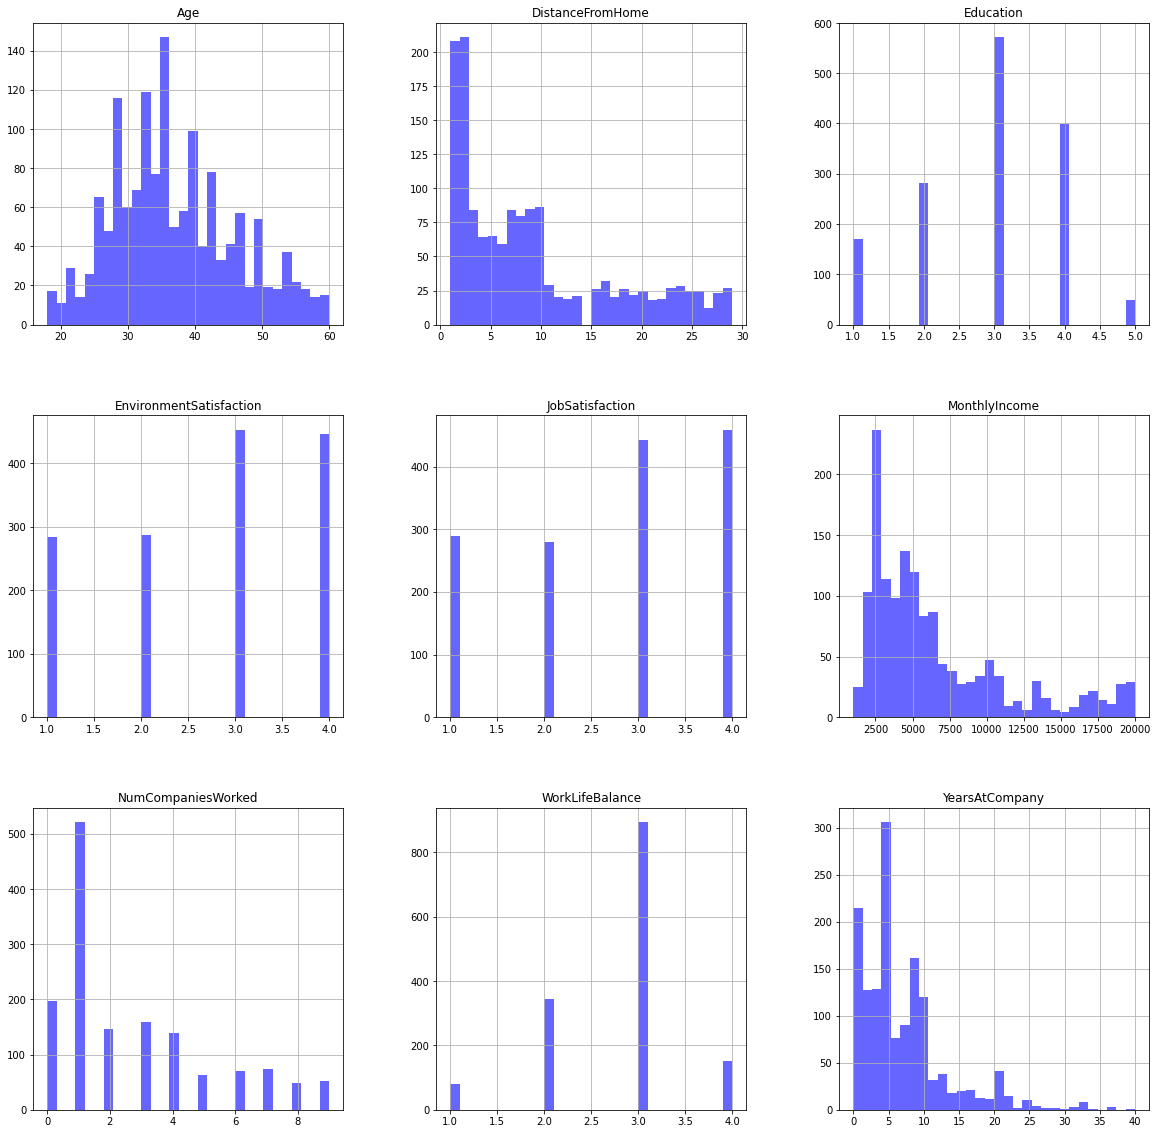

In [5]:
DataFrame.hist(bins=30, figsize=(20,20), color='b', alpha=0.6)

In [6]:
attrition = DataFrame[DataFrame['Attrition'] == 1]
no_attrition = DataFrame[DataFrame['Attrition']==0]

In [7]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type":"xy"},{"type":"domain"}]],
                    subplot_titles= ("Count of Attrition", "Distribution of Attrition"))

fig.add_trace(go.Bar(x = DataFrame['Attrition'].value_counts(),
                     y = ['Employee who stayed', 'Employee who left'],
                     orientation = 'h',
                     opacity=0.8),
                     row=1,col=1)

fig.add_trace(go.Pie(values=DataFrame['Attrition'].value_counts(),
                    opacity=0.8),
                    row=1, col=2)
fig.update_layout(height=400, showlegend=False)

fig.show()

In [8]:
# histogram for age
plt.figure(figsize=(10,8))
DataFrame['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

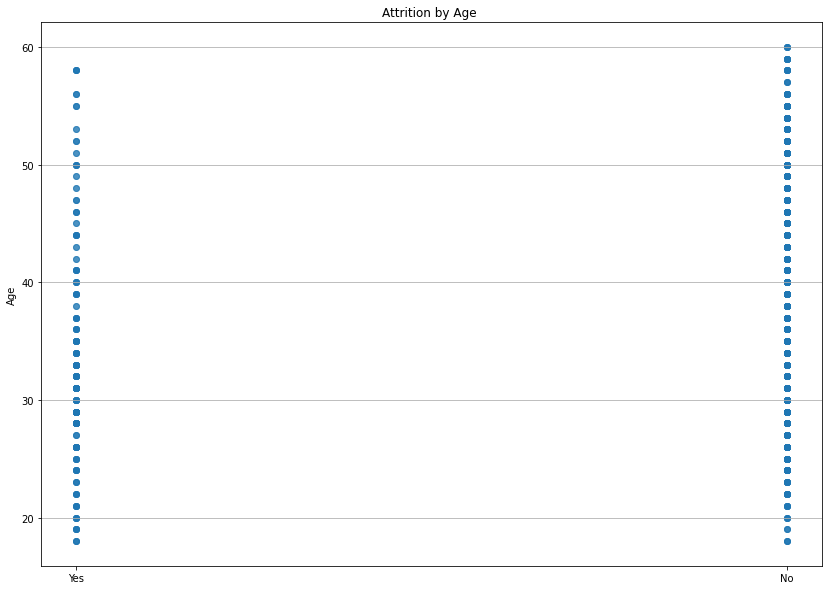

In [9]:
# explore data for Attrition by Age
plt.figure(figsize=(14,10))
plt.scatter(DataFrame.Attrition,DataFrame.Age, alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

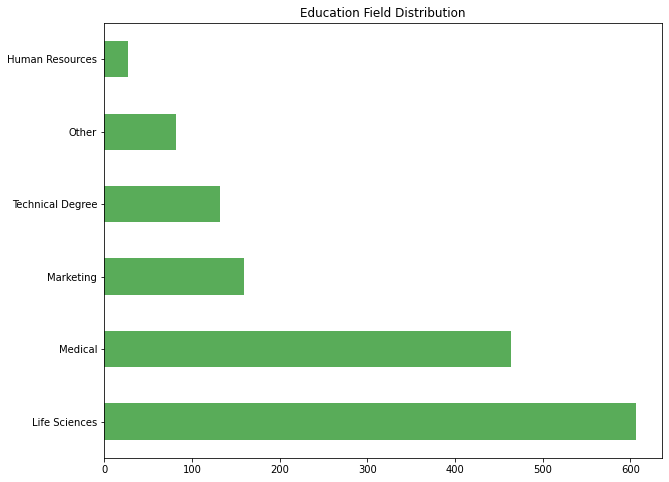

In [10]:
# explore data for Education Field distribution
plt.figure(figsize=(10,8))
DataFrame.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

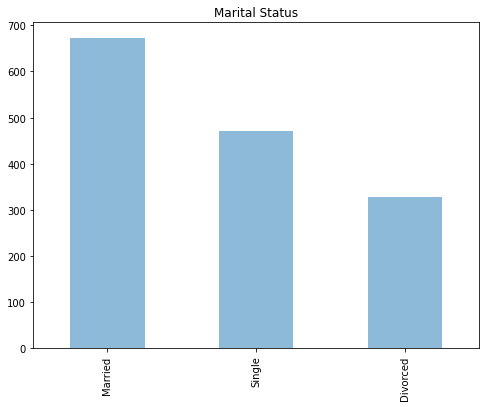

In [11]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
DataFrame.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.title("Marital Status")
plt.show()

In [12]:
DataFrame.describe()

Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean     36.923810          9.192517     2.912925                 2.721769   
std       9.135373          8.106864     1.024165                 1.093082   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      36.000000          7.000000     3.000000                 3.000000   
75%      43.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  \
count      1470.000000    1470.000000         1470.000000      1470.000000   
mean          2.728571    6502.931293            2.693197         2.761224   
std           1.102846    4707.956783            2.498009         0.706476   
min           1.000000    1009.000000            0.000000         1.000000   
25%           2.000000    2911.000000            1.000000         2.000000   
50%           3.000000    4919.000000            2.000000         3.000000   
75%           4.000000    8379.000000            4.000000         3.000000   
max           4.000000   19999.000000            9.000000         4.000000   

       YearsAtCompany  
count     1470.000000  
mean         7.008163  
std          6.126525  
min          0.000000  
25%          3.000000  
50%          5.000000  
75%          9.000000  
max         40.000000

In [13]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [14]:
DataFrame.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [15]:
DataFrame.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [16]:
DataFrame['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
DataFrame['Attrition'].dtypes

dtype('O')

In [18]:
DataFrame['Attrition'].replace('Yes',1, inplace=True)
DataFrame['Attrition'].replace('No',0, inplace=True)

In [19]:
DataFrame.head(10)

Age  Attrition              Department  DistanceFromHome  Education  \
0   41          1                   Sales                 1          2   
1   49          0  Research & Development                 8          1   
2   37          1  Research & Development                 2          2   
3   33          0  Research & Development                 3          4   
4   27          0  Research & Development                 2          1   
5   32          0  Research & Development                 2          2   
6   59          0  Research & Development                 3          3   
7   30          0  Research & Development                24          1   
8   38          0  Research & Development                23          3   
9   36          0  Research & Development                27          3   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   
5  Life Sciences                        4                4        Single   
6        Medical                        3                1       Married   
7  Life Sciences                        4                3      Divorced   
8  Life Sciences                        4                3        Single   
9        Medical                        3                3       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2  
5           3068                   0                2               7  
6           2670                   4                2               1  
7           2693                   1                3               1  
8           9526                   0                3               9  
9           5237                   6                2               7

In [20]:
def categorical_colum_investigaton(col_name):
    """First Plot: Pie chart for categorical column to see percentage of each value
       Second Plot: Count plot for categorical column to see the number of count for each of the type
       Third Plot is Number of Count for separeted for Attribition"""

    f,ax = plt.subplots(1,3, figsize=(18,6))
    DataFrame[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
    DataFrame[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[1])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    sns.countplot(col_name, hue='Attrition',data=DataFrame, ax=ax[2], palette='Set3')
    ax[2].set_title(f'Attrition by {col_name}')
    ax[2].set_xlabel(f'{col_name}')
    ax[2].set_ylabel('Count')

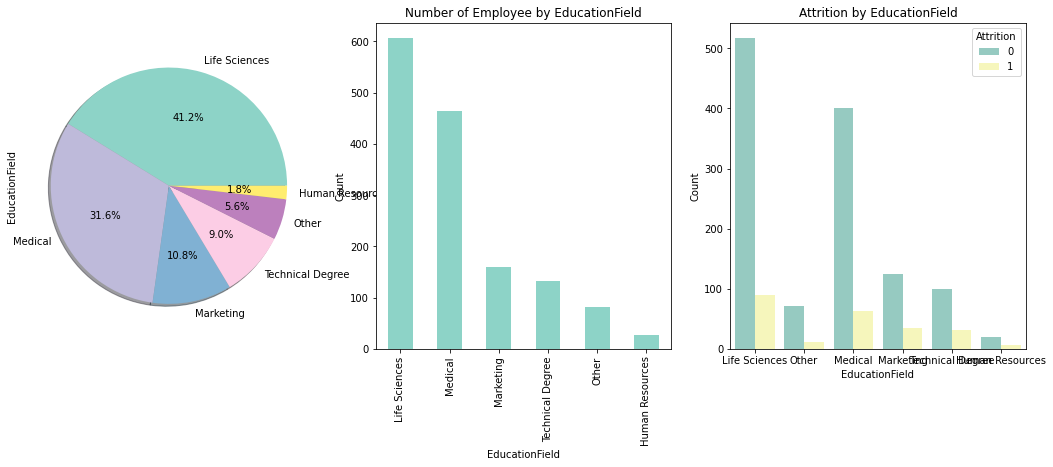

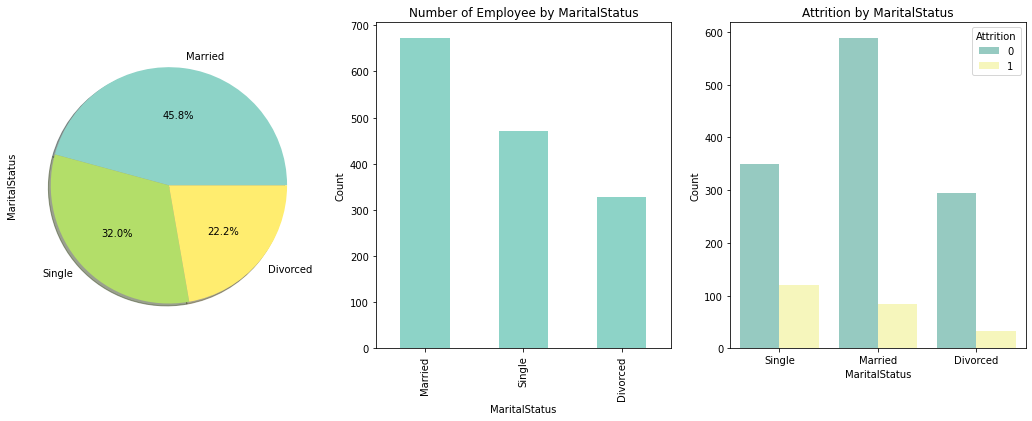

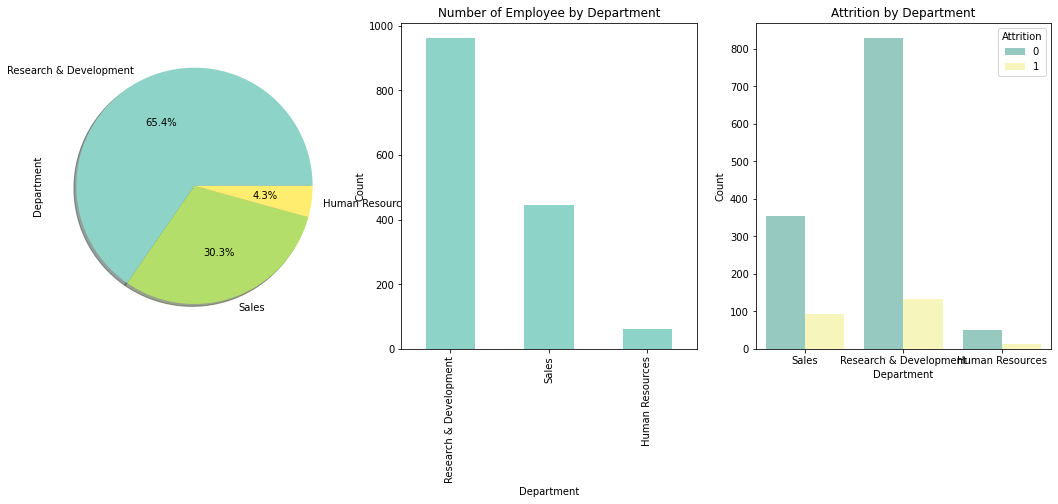

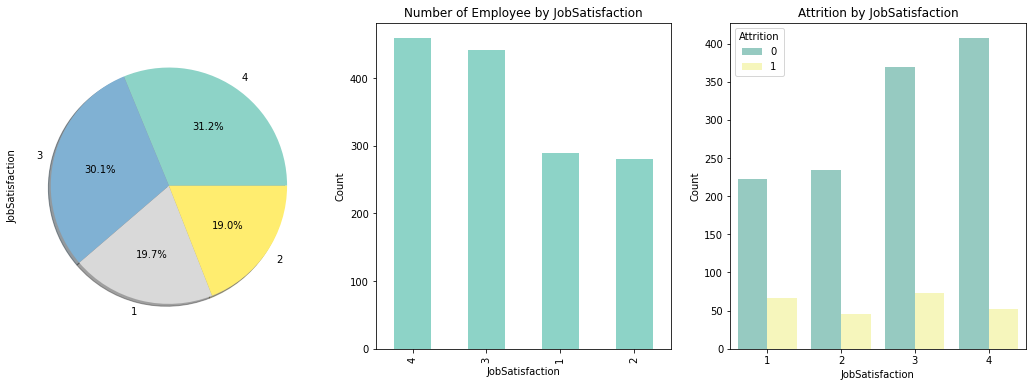

In [21]:
categorical_colum_investigaton('EducationField')
categorical_colum_investigaton('MaritalStatus')
categorical_colum_investigaton('Department')
categorical_colum_investigaton('DistanceFromHome')
categorical_colum_investigaton('JobSatisfaction')

In [22]:
correlations = DataFrame.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, cmap = 'rainbow', annot=True)
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

In [23]:
attrition = DataFrame[DataFrame['Attrition'] == 1]
no_attrition = DataFrame[DataFrame['Attrition']==0]

def numerical_colum_investigaton(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayes', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='Attrition',data=DataFrame, palette='Set2', ax=ax[1])

In [24]:
numerical_colum_investigaton('DistanceFromHome')

In [25]:
numerical_colum_investigaton('MonthlyIncome')

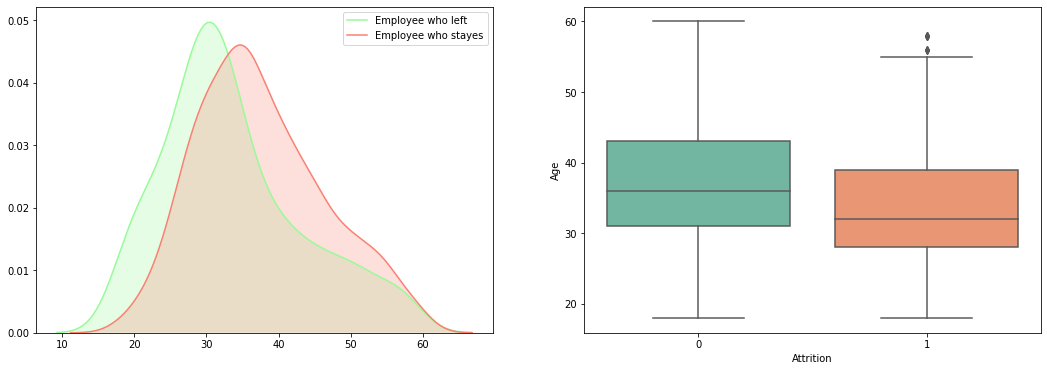

In [26]:
numerical_colum_investigaton('Age')

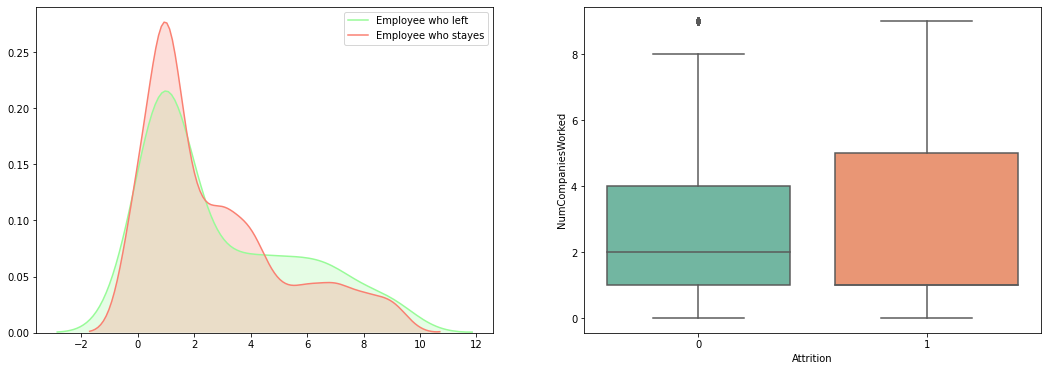

In [27]:
numerical_colum_investigaton('NumCompaniesWorked')

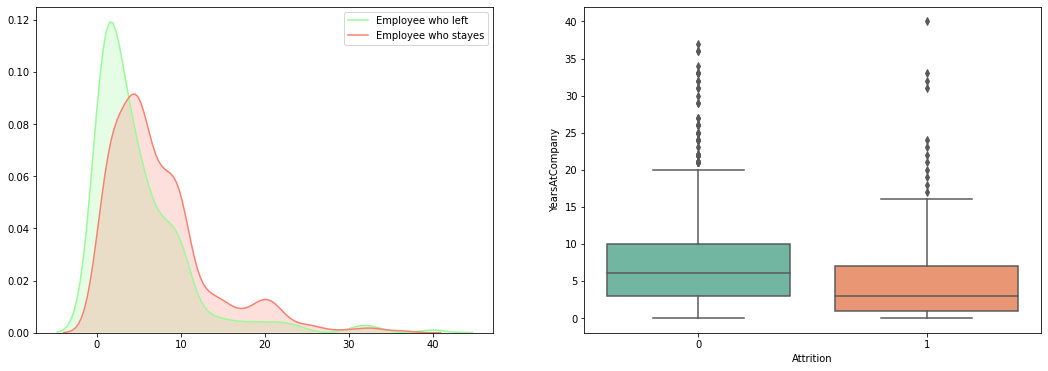

In [28]:
numerical_colum_investigaton('YearsAtCompany')

___

## CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

### A LOGISTIC REGRESSION CLASSIFIER 

In [29]:
# building up a logistic regression model
X = DataFrame.drop(['Attrition'],axis=1)
X.head()
Y = DataFrame['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [30]:
DataFrame['EducationField'].replace('Life Sciences',1, inplace=True)
DataFrame['EducationField'].replace('Medical',2, inplace=True)
DataFrame['EducationField'].replace('Marketing', 3, inplace=True)
DataFrame['EducationField'].replace('Other',4, inplace=True)
DataFrame['EducationField'].replace('Technical Degree',5, inplace=True)
DataFrame['EducationField'].replace('Human Resources', 6, inplace=True)

In [31]:
DataFrame['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [32]:
DataFrame['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [33]:
DataFrame['Department'].replace('Research & Development',1, inplace=True)
DataFrame['Department'].replace('Sales',2, inplace=True)
DataFrame['Department'].replace('Human Resources', 3, inplace=True)

In [34]:
DataFrame['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [35]:
DataFrame['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [36]:
DataFrame['MaritalStatus'].replace('Married',1, inplace=True)
DataFrame['MaritalStatus'].replace('Single',2, inplace=True)
DataFrame['MaritalStatus'].replace('Divorced',3, inplace=True)

In [37]:
DataFrame['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [38]:
x=DataFrame.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [39]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [40]:
y=DataFrame['Attrition']

In [41]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [42]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  DataFrame, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [43]:
y = np.ravel(y)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

0.8408163265306122

In [45]:
y.mean()

0.16122448979591836

In [46]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [47]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [48]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.86179629 0.13820371]
 [0.80754595 0.19245405]
 [0.74123953 0.25876047]
 [0.83441331 0.16558669]
 [0.73499944 0.26500056]
 [0.7909775  0.2090225 ]
 [0.85615202 0.14384798]
 [0.85699674 0.14300326]
 [0.96699053 0.03300947]
 [0.93685203 0.06314797]
 [0.95099268 0.04900732]
 [0.83101544 0.16898456]
 [0.86296552 0.13703448]
 [0.86581192 0.13418808]
 [0.88750595 0.11249405]
 [0.88892618 0.11107382]
 [0.88569719 0.11430281]
 [0.78516588 0.21483412]
 [0.79794491 0.20205509]
 [0.88511296 0.11488704]
 [0.7065161  0.2934839 ]
 [0.94676686 0.05323314]
 [0.86736256 0.13263744]
 [0.84276457 0.15723543]
 [0.60336877 0.39663123]
 [0.81129201 0.18870799]
 [0.91813724 0.08186276]
 [0.93285519 0.06714481]
 [0.68230779 0.31769221]
 [0.87027131 0.12972869]
 [0.87266382 0.12733618]
 [0.76968745 0.23031255]
 [0.8643576  0.1356424 ]
 [0.95758874 0.04241126]
 [0.84461482 0.15538518]
 [0.86719352 0.13280648]
 [0.90465972 0.09534028]
 [0.68936434 0.31063566]
 [0.90703612 0.09296388]
 [0.80663482 0.19336518]


In [49]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6502502887947632


In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
print(f"Accuracy of Logistic Regression: %{100* accuracy_score(predicted, y_test)}")

Accuracy of Logistic Regression: %84.35374149659864


In [52]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True)

In [53]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [54]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [55]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[6.25571884e-07 9.99999374e-01]]


Logistic ROC AUC:0.659
No Skill ROC AUC:0.500


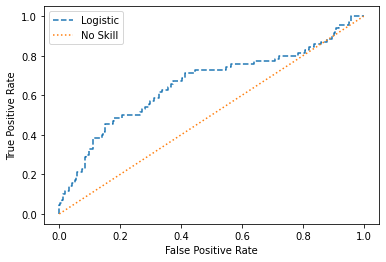

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#predict probabilities
y_probability = model.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability = y_probability[:,1]
## calculate scores
logistic_roc_score = roc_auc_score(y_test, y_probability)
print("Logistic ROC AUC:%.3f" %(logistic_roc_score) )

# generate a no skill prediction (majority class)
noskill_prob = [0 for _ in range(len(y_test))]
noskill_roc_auc = roc_auc_score(y_test,noskill_prob )
print("No Skill ROC AUC:%.3f" %(noskill_roc_auc))

#calculate the roc curve
lo_fpr, lo_tpr, _ =roc_curve(y_test, y_probability)
no_fpr, no_tpr, _ =roc_curve(y_test, noskill_prob)

plt.plot(lo_fpr, lo_tpr, linestyle='dashed', label ='Logistic')
plt.plot(no_fpr, no_tpr, linestyle='dotted', label= 'No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### A RANDOM FOREST CLASSIFIER 

In [57]:
from sklearn.ensemble import RandomForestClassifier
model_Ran = RandomForestClassifier()
model_Ran.fit(X_train, y_train)
predict_Ran = model_Ran.predict(X_test)
print(f"Accuracy of Randon Forest Model: {accuracy_score(y_test, predict_Ran)}")

Accuracy of Randon Forest Model: 0.8390022675736961


In [58]:
print (metrics.accuracy_score(y_test, predict_Ran))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8390022675736961
0.6502502887947632


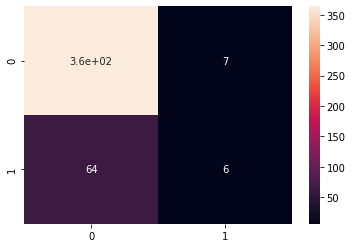

In [59]:
cm_Ran = confusion_matrix(y_test, predict_Ran)
sns.heatmap(cm_Ran, annot=True)

In [60]:
print(classification_report(y_test, predict_Ran))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       371
         1.0       0.46      0.09      0.14        70

    accuracy                           0.84       441
   macro avg       0.66      0.53      0.53       441
weighted avg       0.79      0.84      0.79       441



In [61]:
print(X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [62]:
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model_Ran.predict_proba(kk))

[[0.47 0.53]]


In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
noskill_prob = [0 for _ in range(len(y_test))]
noskill_roc_auc = roc_auc_score(y_test,noskill_prob )
print("No Skill ROC AUC:%.3f" %(noskill_roc_auc))

#predict probabilities
y_probability = model.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability = y_probability[:,1]
## calculate scores
logistic_roc_score = roc_auc_score(y_test, y_probability)
print("Logistic ROC AUC:%.3f" %(logistic_roc_score) )



#Probabilities for random forest
y_probability_Ran = model_Ran.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability_Ran = y_probability_Ran[:,1]
## calculate scores
RandomF_roc_score = roc_auc_score(y_test, y_probability_Ran)
print("Random Forest ROC AUC:%.3f" %(RandomF_roc_score) )


#calculate the roc curve
lo_fpr, lo_tpr, _ =roc_curve(y_test, y_probability)
no_fpr, no_tpr, _ =roc_curve(y_test, noskill_prob)
ra_fpr, ra_tpr, _ =roc_curve(y_test, y_probability_Ran)


plt.plot(lo_fpr, lo_tpr, linestyle='dashed', color= 'r', label ='Logistic Regression Model')
plt.plot(ra_fpr, ra_tpr, linestyle='dashed', color= 'b', label= 'Random Forest Model')
plt.plot(no_fpr, no_tpr, linestyle='dotted', label= 'No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

No Skill ROC AUC:0.500
Logistic ROC AUC:0.659
Random Forest ROC AUC:0.615


### TRYING MULTIPLE MODELS WITH CROSS VALIDATION

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV




kfold = KFold(n_splits=10, random_state=22,shuffle=True)
xyz= []
accuracy = []
std = []
y_pred_list = []


classifiers = ['Linear Svm',
              'Radical Svm',
              'Logistic Regression',
              'KNN',
              'Decision Tree',
              'Naive Bayes',
              'Random Forest',
              'XGBoost']

models = [svm.SVC(kernel='linear'),
         svm.SVC(kernel='rbf'),
         LogisticRegression(solver='liblinear'),
         KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(n_estimators=100),
          XGBClassifier()
        ]

for i in models:
    model = i 
    cv_result =cross_val_score(model, 
                               X_train, 
                               y_train, 
                               cv=kfold,
                              scoring='accuracy')
    y_pred_list.append(predicted)
    cv_result =cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
    
    
    
new_model_data_frame =pd.DataFrame({'Cross-Validation Mean': xyz,
                                   'Std': std},
                                   index=classifiers)

new_model_data_frame

Cross-Validation Mean       Std
Linear Svm                        0.837683  0.042429
Radical Svm                       0.837683  0.042429
Logistic Regression               0.839634  0.042659
KNN                               0.821188  0.042573
Decision Tree                     0.728917  0.060037
Naive Bayes                       0.830897  0.043271
Random Forest                     0.829926  0.040113
XGBoost                           0.803693  0.039978

In [65]:
plt.subplots(figsize=(12,16))
plt.xticks(rotation=45)
sns.boxplot(new_model_data_frame.index, accuracy)

In [66]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd =GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)


gd.fit(X_train,y_train)


print(gd.best_score_)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8416054937248403


[Parallel(n_jobs=1)]: Done 1300 out of 1300 | elapsed:   58.3s finished
